In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np

# NIFTY Analysis

In [37]:
ticker_symbol = '^NSEI'
ticker_data = yf.Ticker(ticker_symbol)

start = '2015-01-01'
end = '2024-07-01'

df = ticker_data.history(start = start , end = end)
df.index = df.index.date

In [38]:
df.drop(['Volume' , 'Stock Splits' , 'Dividends'] , axis = 1 , inplace = True)
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))

<Axes: >

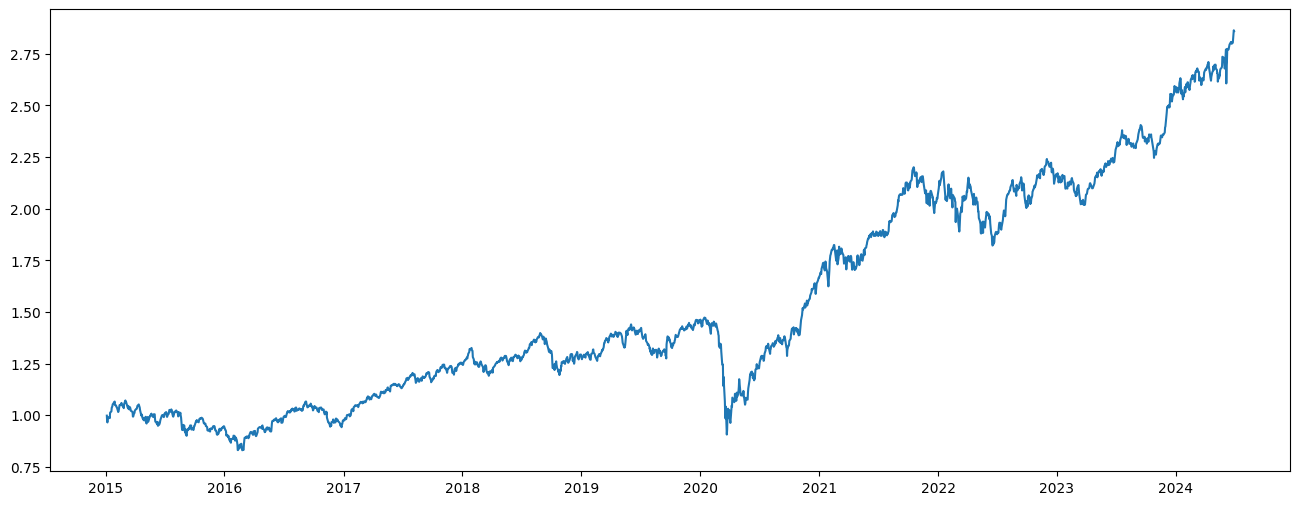

In [39]:
df['log_returns'].cumsum().apply(np.exp).plot(figsize  = (16 , 6))

In [40]:
window = 14
df['min'] = df['Close'].rolling(window = window).min()
df['max'] = df['Close'].rolling(window = window).max()
df['std'] = df['Close'].rolling(window = window).std()
df['median'] = df['Close'].rolling(window  =window).median()
df['mean'] = df['Close'].rolling(window  =window).mean()

<Axes: >

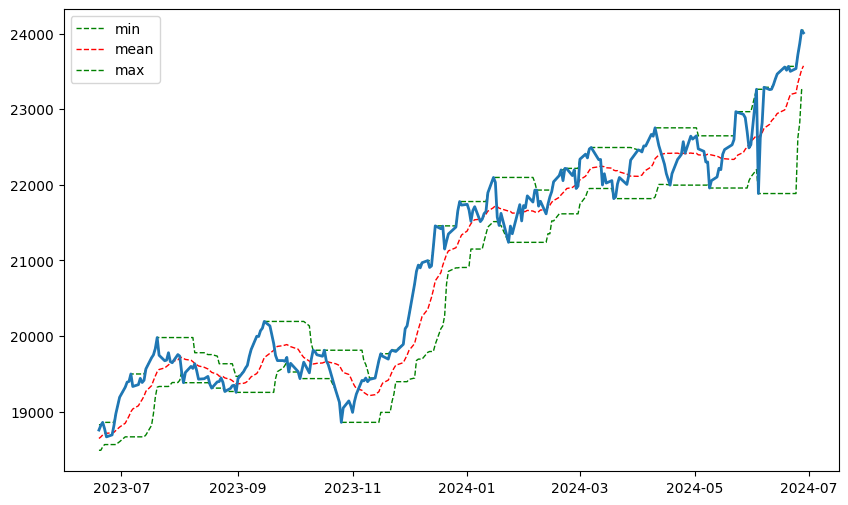

In [41]:
ax = df[['min' , 'mean' , 'max']].iloc[-252:].plot(figsize=(10,6), style= ['g--' , 'r--' , 'g--'],lw = 1) #
df['Close'].iloc[-252:].plot(ax = ax , lw = 2.0)                                                

In [42]:
# Simple Moving Averages

In [46]:
df['Slow_SMA'] = df['Close'].rolling(window=100).mean()
df['Fast_SMA'] = df['Close'].rolling(window=252).mean()

<Axes: >

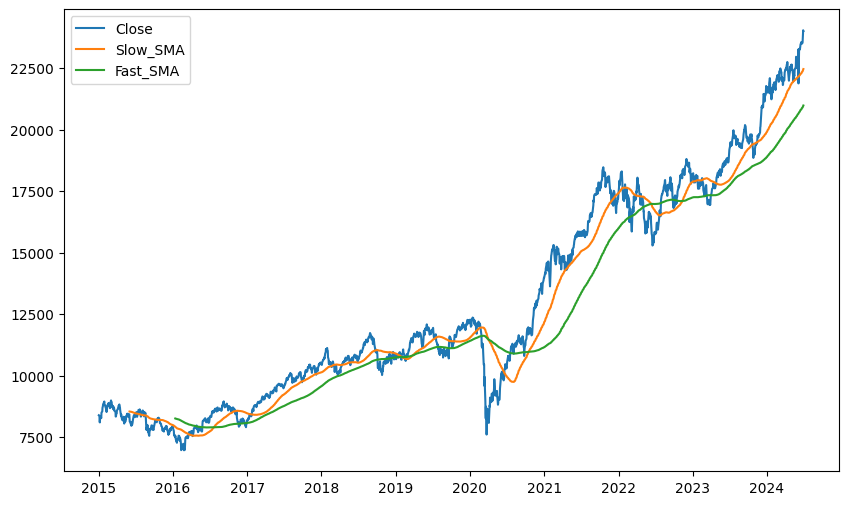

In [47]:
df[['Close' , 'Slow_SMA' , 'Fast_SMA']].plot(figsize = (10,6))